In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [2]:
dataset= r'C:\Users\DELL\Desktop\pneumonia\dataset'
INIT_LR=1e-3
EPOCHS=10
BS=8

args={}
args['dataset']=dataset
args

{'dataset': 'C:\\Users\\DELL\\Desktop\\pneumonia\\dataset'}

In [3]:
import numpy as np
import cv2
iPath = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPath:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [4]:
'img.jpeg'

'img.jpeg'

In [5]:
import os
Data_Dir = r"C:/Users/DELL/Desktop/pneumonia/dataset/Data//"
Cimages = os.listdir(Data_Dir+"Pneumonia")
Nimages = os.listdir(Data_Dir+"Normal")

In [6]:

import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    pneumonia = cv2.imread(Data_Dir+"Pneumonia//"+Cimages[i])
    pneumonia = skimage.transform.resize(pneumonia, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, pneumonia), axis=1)
    print("Normal Chest X-ray Vs Pneumonia Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()

Normal Chest X-ray Vs Pneumonia Chest X-ray


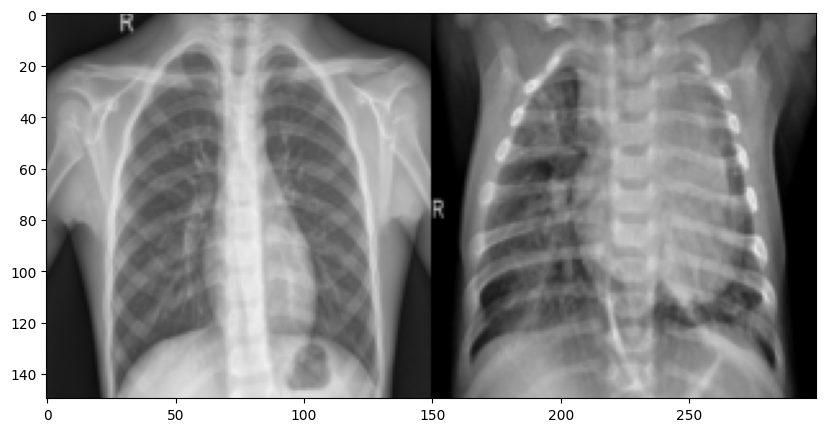

Normal Chest X-ray Vs Pneumonia Chest X-ray


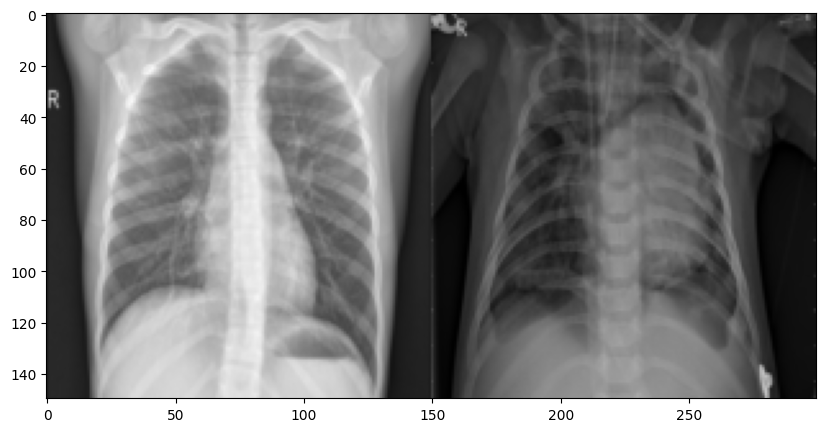

Normal Chest X-ray Vs Pneumonia Chest X-ray


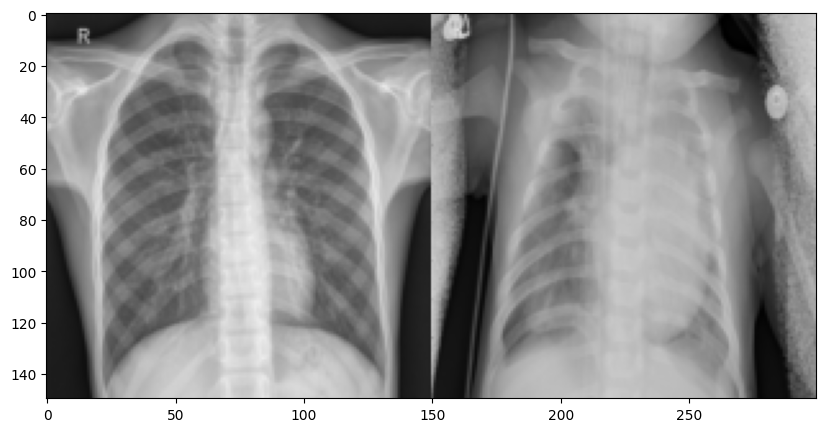

Normal Chest X-ray Vs Pneumonia Chest X-ray


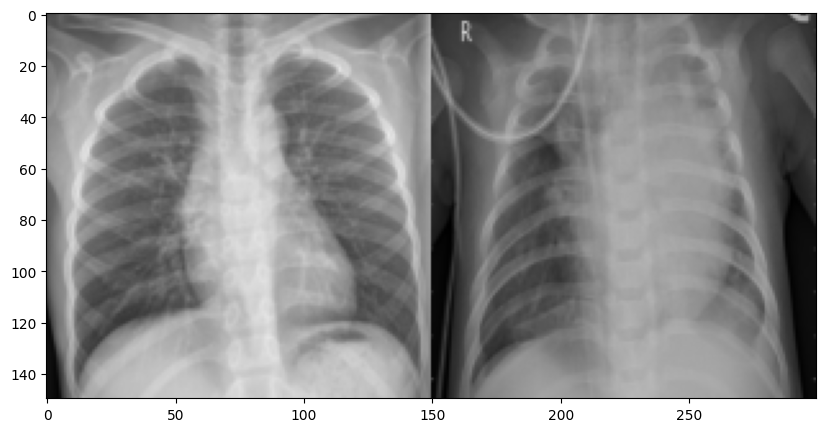

Normal Chest X-ray Vs Pneumonia Chest X-ray


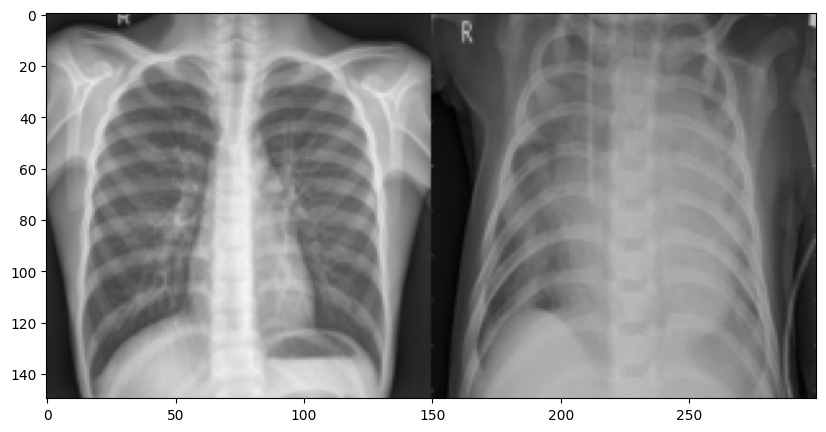

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [7]:
for i in range(0,5):
    plotter(i)

LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [8]:

bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False


In [9]:

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((480, 224, 224, 3), (120, 224, 224, 3), (480, 2), (120, 2))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


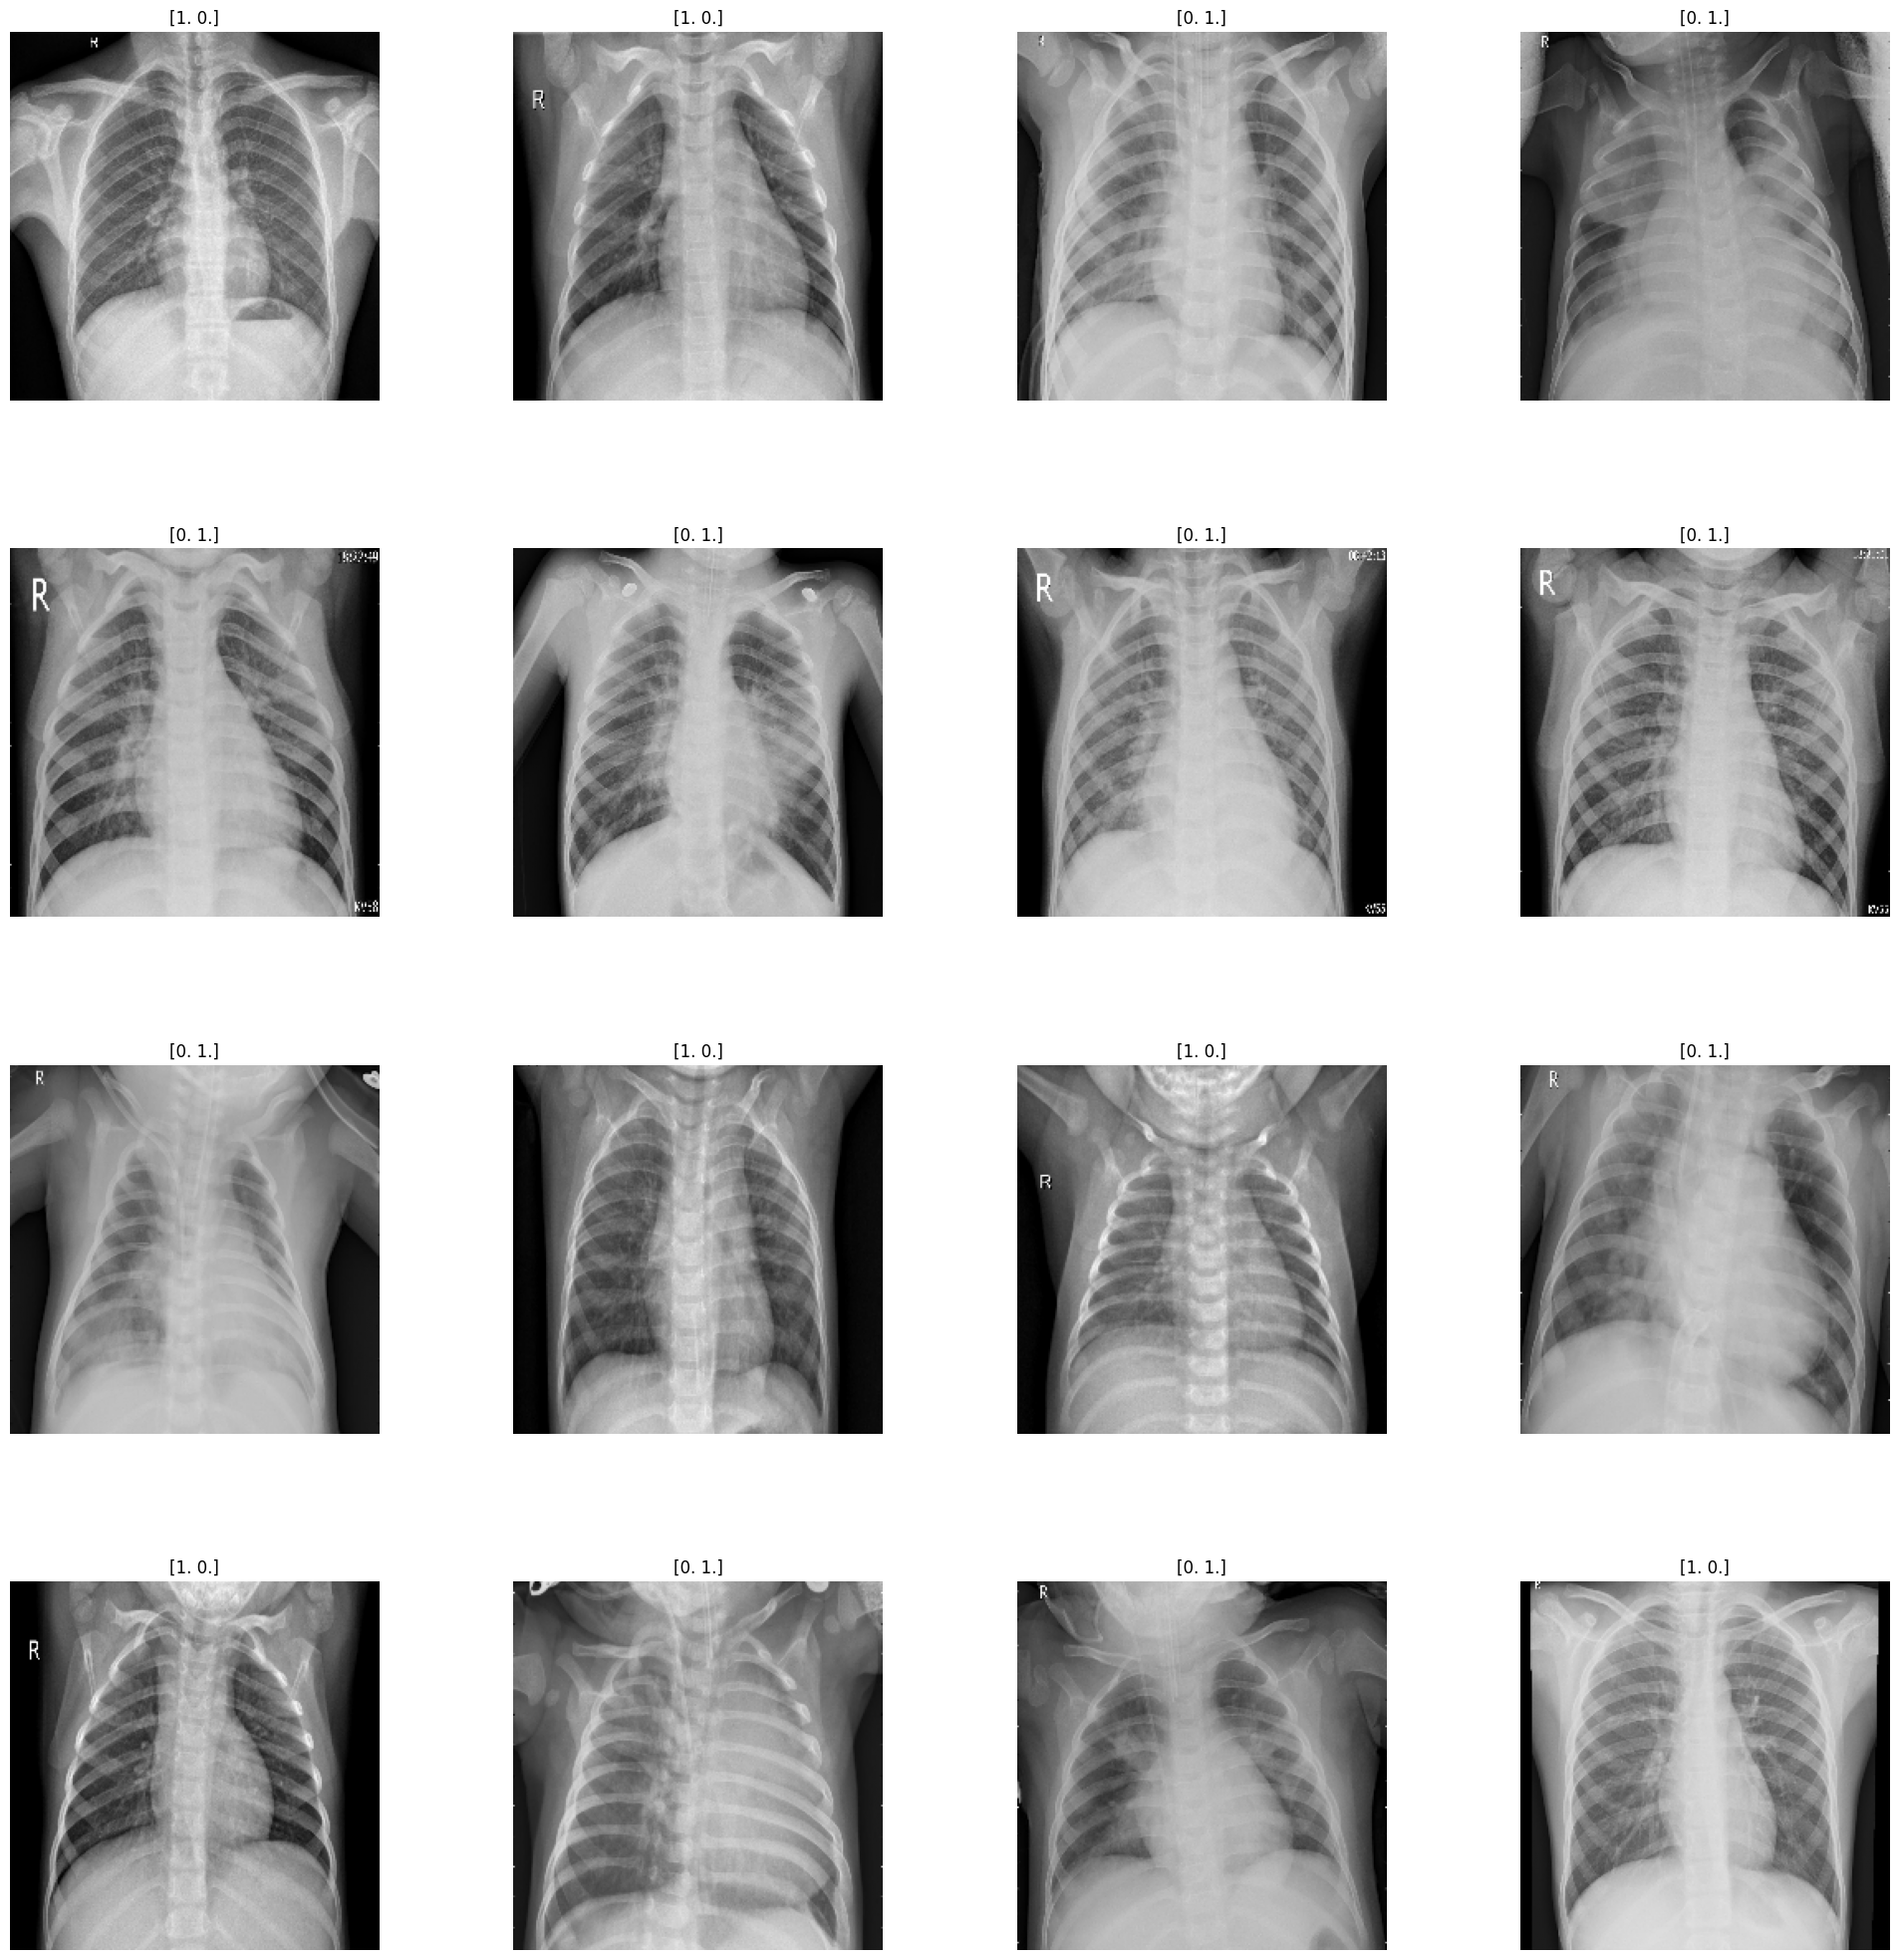

In [10]:

W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [11]:

import tensorflow as tf
opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer= opt, metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)


Compiling Starts


C:\Users\DELL\AppData\Local\Temp\ipykernel_10828\3265899370.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  R = model.fit_generator(


Epoch 1/10
60/60 [==============================] - 264s 4s/step - loss: 0.6883 - accuracy: 0.5708 - val_loss: 0.6194 - val_accuracy: 0.7167
Epoch 2/10
60/60 [==============================] - 210s 4s/step - loss: 0.5836 - accuracy: 0.7563 - val_loss: 0.5391 - val_accuracy: 0.8167
Epoch 3/10
60/60 [==============================] - 208s 3s/step - loss: 0.5185 - accuracy: 0.7792 - val_loss: 0.4672 - val_accuracy: 0.8583
Epoch 4/10
60/60 [==============================] - 210s 4s/step - loss: 0.4702 - accuracy: 0.8188 - val_loss: 0.4155 - val_accuracy: 0.8750
Epoch 5/10
60/60 [==============================] - 210s 4s/step - loss: 0.4374 - accuracy: 0.8104 - val_loss: 0.3691 - val_accuracy: 0.8833
Epoch 6/10
60/60 [==============================] - 229s 4s/step - loss: 0.3937 - accuracy: 0.8542 - val_loss: 0.3561 - val_accuracy: 0.8833
Epoch 7/10
60/60 [==============================] - 231s 4s/step - loss: 0.3814 - accuracy: 0.8604 - val_loss: 0.3199 - val_accuracy: 0.9000
Epoch 8/10
60

15/15 [==============================] - 45s 3s/step


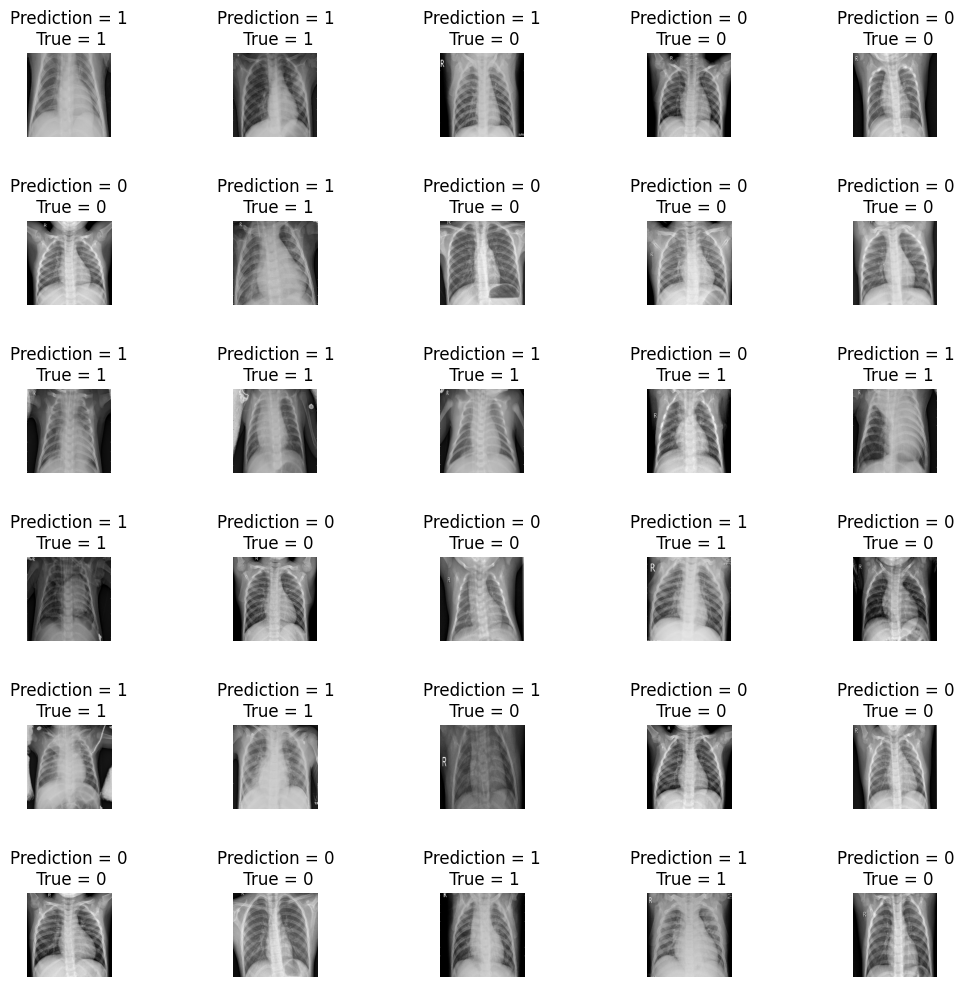

In [12]:

L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [13]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

15/15 [==============================] - 47s 3s/step
              precision    recall  f1-score   support

      Normal       0.86      0.93      0.90        60
   Pneumonia       0.93      0.85      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)


0.8916666666666667

In [15]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[[56  4]
 [ 9 51]]
acc: 0.8917
sensitivity: 0.9333
specificity: 0.8500


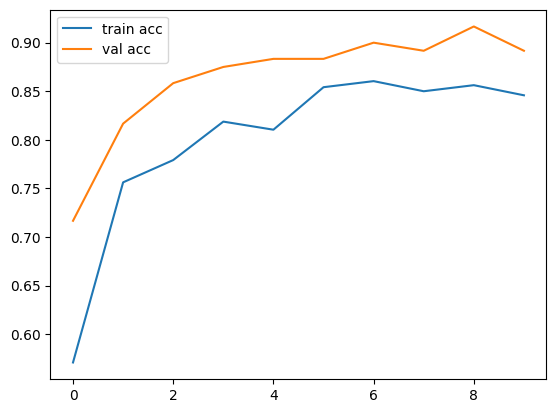

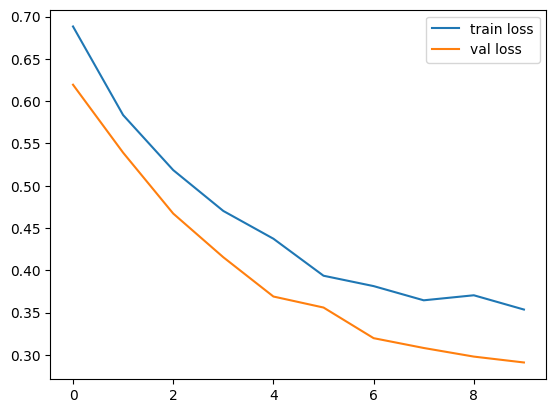

<Figure size 640x480 with 0 Axes>

In [16]:

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [17]:
model.save('pneumonia_classifier.h5')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step
Prediction: Pneumonia


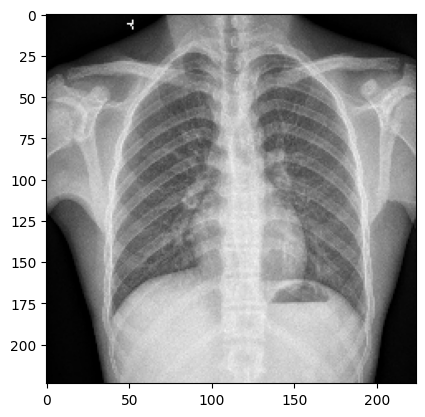

In [27]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('pneumonia_classifier.h5')
from keras.applications.vgg16 import preprocess_input
img = tf.keras.utils.load_img(r'C:\Users\DELL\Desktop\pneumonia\test\normal\3.jpeg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Pneumonia')


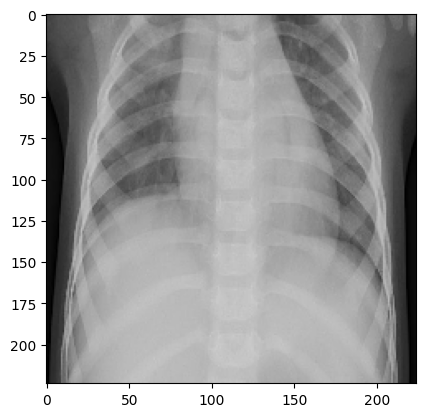

In [26]:
img = tf.keras.utils.load_img(r'C:\Users\DELL\Desktop\pneumonia\test\pneumonia\1.jpeg', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)


In [21]:

x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)


In [22]:

img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[0]:
  print('Prediction: Pneumonia')
else:
  print('Prediction: Normal')

1/1 [==============================] - 0s 388ms/step
Prediction: Pneumonia
